**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns

**Importing Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Works/CKD Prediction/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Imputing Null Values**

In [7]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute = imp_mode.fit_transform(df)

df_imputed = pd.DataFrame(impute)
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
#theList = []
for i in df_imputed.columns:
  print("------------------------------------------------",i,"-------------------------------------------------------")
  print('\n')
  print(df_imputed[i].unique().tolist())

------------------------------------------------ id -------------------------------------------------------


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,

In [9]:
print(df_imputed['wc'].mode())
print(df_imputed['rc'].mode())
print(df_imputed['pcv'].mode())

0    9800
Name: wc, dtype: object
0    5.2
Name: rc, dtype: object
0    41
Name: pcv, dtype: object


In [10]:
df_imputed['classification'] = df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)
# replacement_dict = {'\tckd': 'ckd'}
# df_imputed['classification'] = df_imputed['classification'].map(replacement_dict).fillna(df_imputed['classification'])


df_imputed['cad'] = df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)
# replacement_dict = {'\tno': 'no', '\tyes': 'yes'}
# df_imputed['cad'] = df_imputed['cad'].map(replacement_dict).fillna(df_imputed['cad'])

df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)
# replacement_dict = {'\tno': 'no', '\tyes': 'yes', ' yes':'yes'}
# df_imputed['dm'] = df_imputed['dm'].map(replacement_dict).fillna(df_imputed['dm'])

df_imputed["rc"] = df_imputed["rc"].apply(lambda x: '5.2' if x=='\t?' else x)
# replacement_dict = {'\t?': '5.2'}
# df_imputed['rc'] = df_imputed['rc'].map(replacement_dict).fillna(df_imputed['rc'])

df_imputed['wc'] = df_imputed['wc'].apply(lambda x:"9800" if x=="\t6200" else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)
# replacement_dict = {'\t6200': '9800', '\t8400': '9800', '\t?':'9800'}
# df_imputed['wc'] = df_imputed['wc'].map(replacement_dict).fillna(df_imputed['wc'])


df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'41' if x=='\t43' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)
# replacement_dict = {'\t43': '41', '\t?': '41'}
# df_imputed['pcv'] = df_imputed['pcv'].map(replacement_dict).fillna(df_imputed['pcv'])


In [11]:
for i in df_imputed.columns:
  print("------------------------------------------------",i,"-------------------------------------------------------")
  print('\n')
  print(df_imputed[i].unique().tolist())

------------------------------------------------ id -------------------------------------------------------


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,

**Checking Label Imbalance**

In [12]:
class_temp = df_imputed['classification'].value_counts()
class_temp

ckd       250
notckd    150
Name: classification, dtype: int64

In [13]:
temp_df = pd.DataFrame({'classification':class_temp.index, 'values':class_temp.values})
temp_df

,classification,values
0,ckd,250
1,notckd,150


<Axes: xlabel='classification', ylabel='values'>

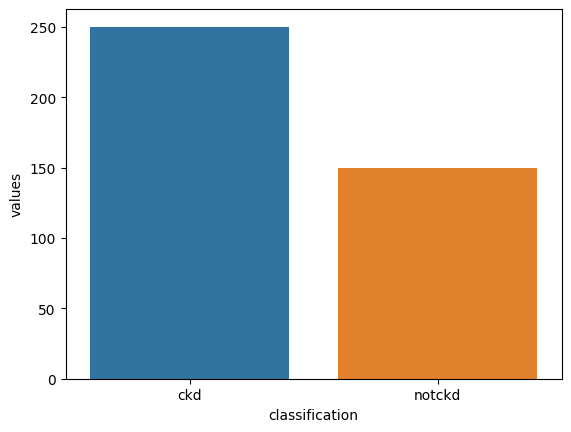

In [14]:
import matplotlib.pyplot as plt

sns.barplot(x='classification', y='values', data=temp_df)

In [15]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [16]:
for i in df.select_dtypes(exclude="object").columns:
  df_imputed[i]=df_imputed[i].apply(lambda x: float(x))
  

In [17]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

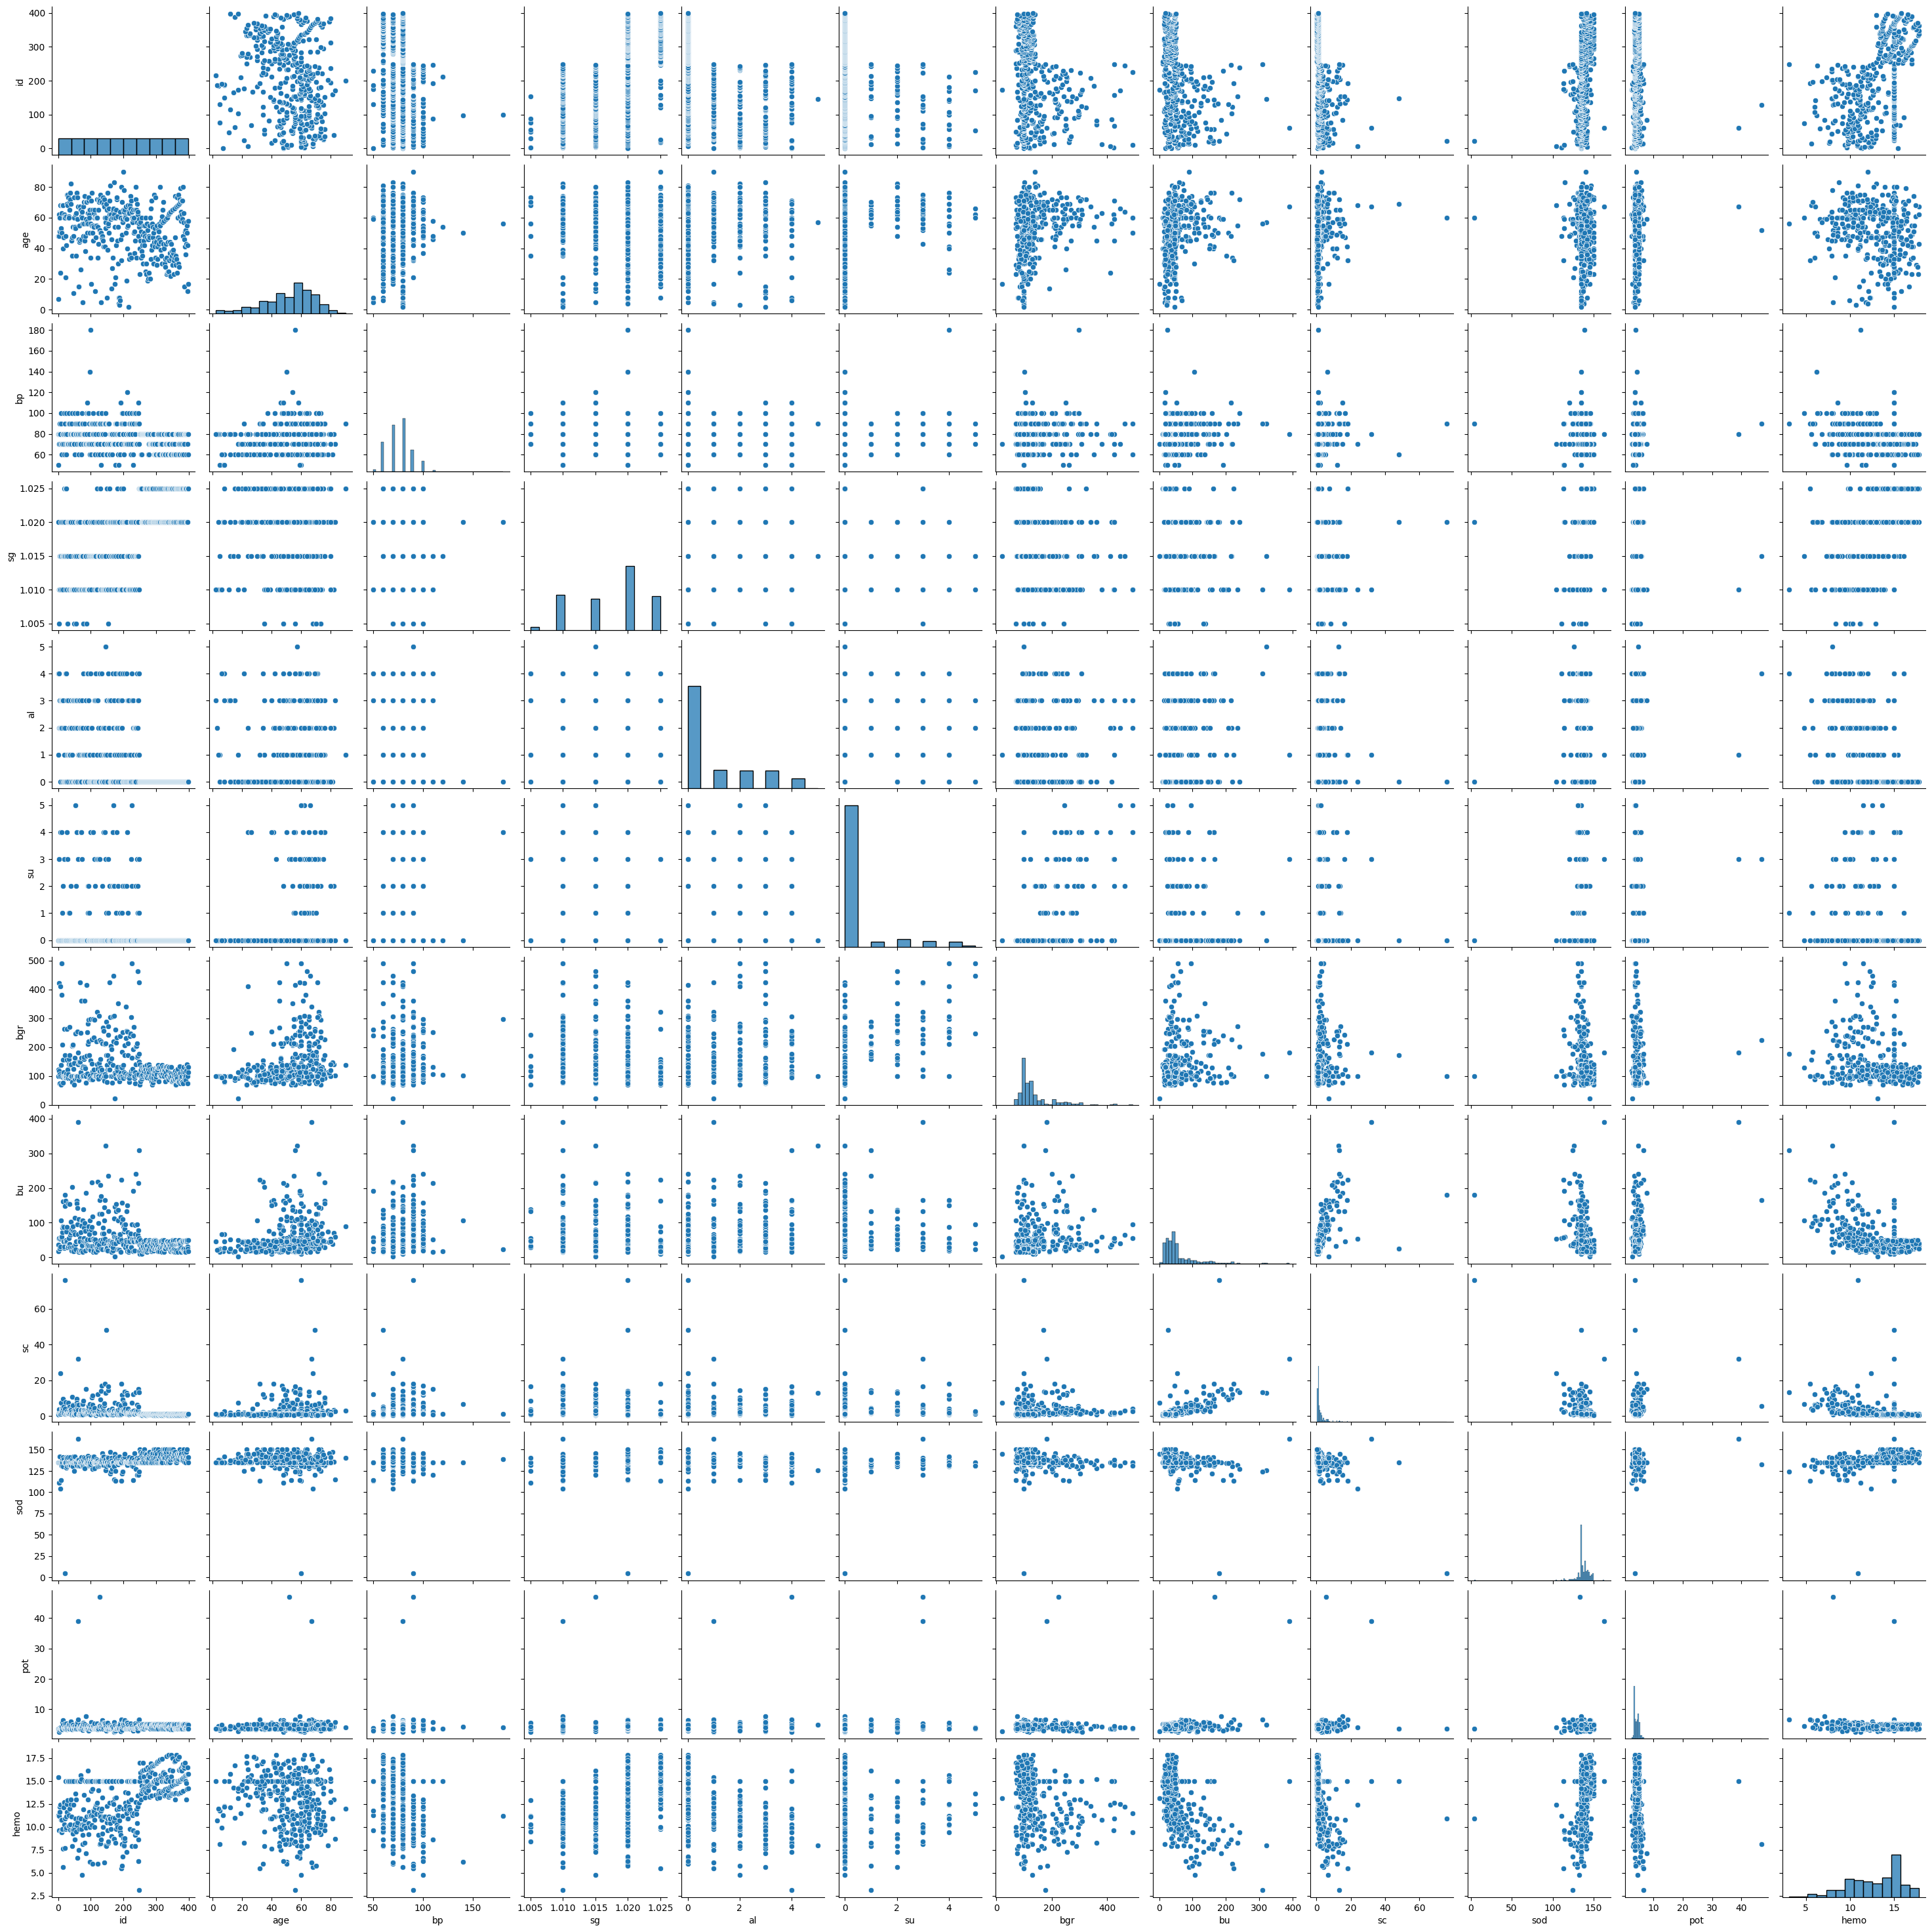

In [18]:
sns.pairplot(df_imputed)

**Finding the distribution of data**

In [19]:
list(df_imputed.select_dtypes(exclude="object").columns)

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


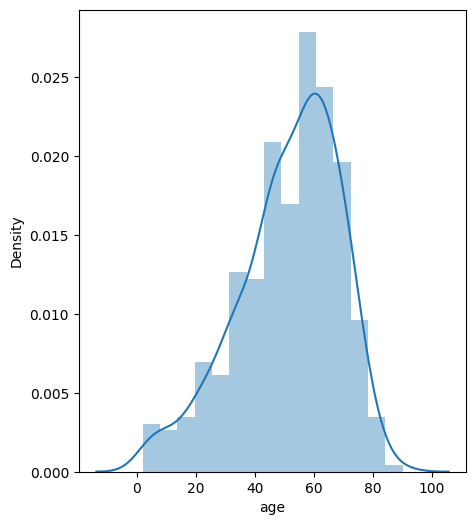

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


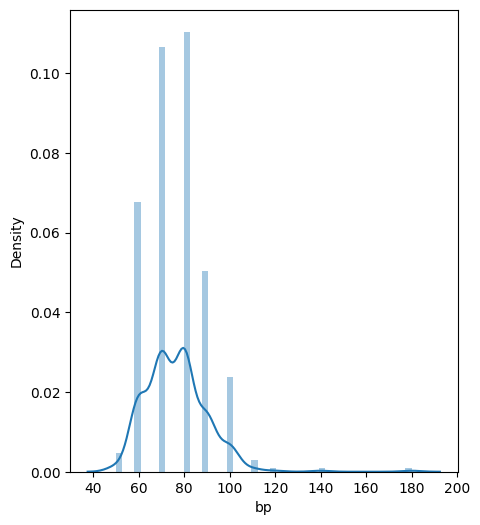

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


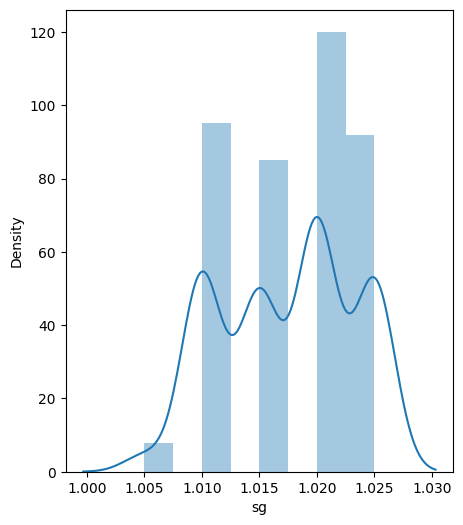

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


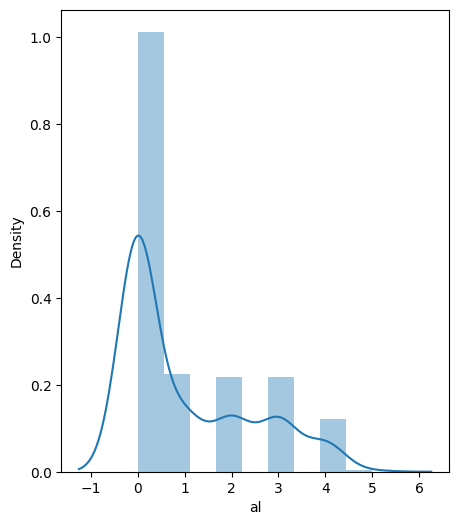

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


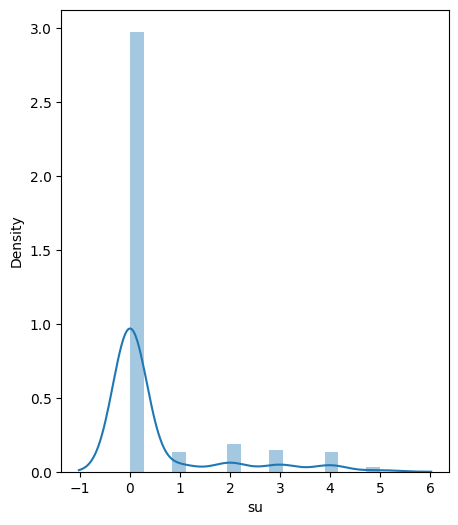

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


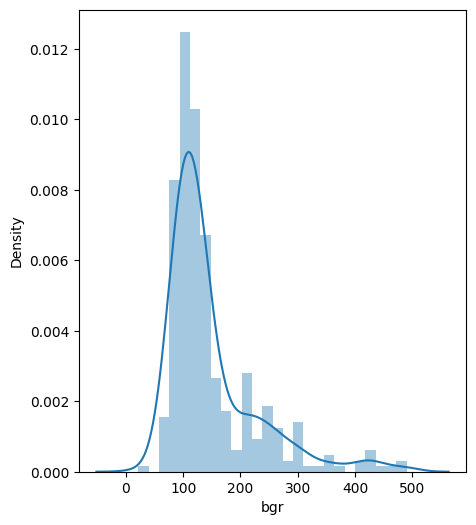

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


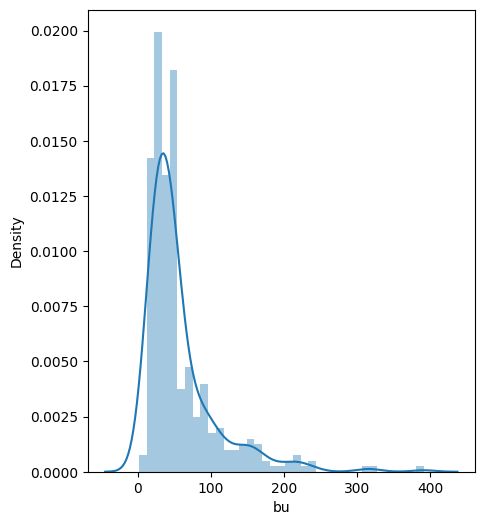

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


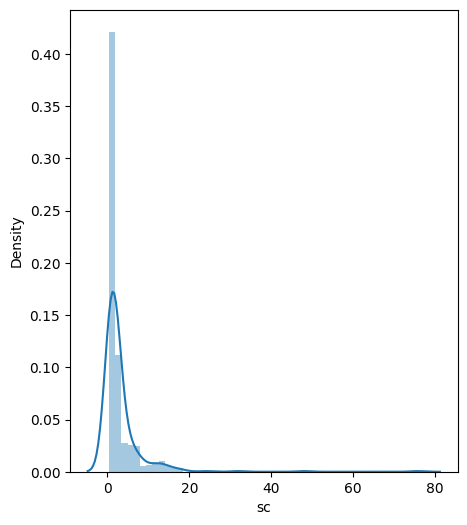

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


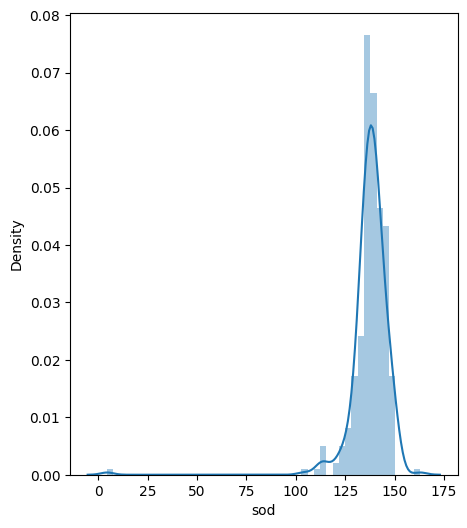

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


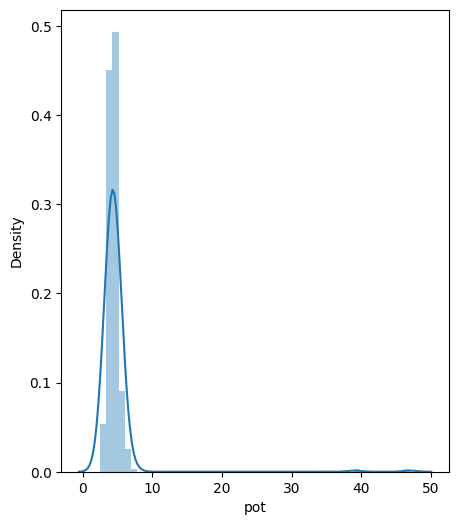

<ipython-input-20-28427c701b75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


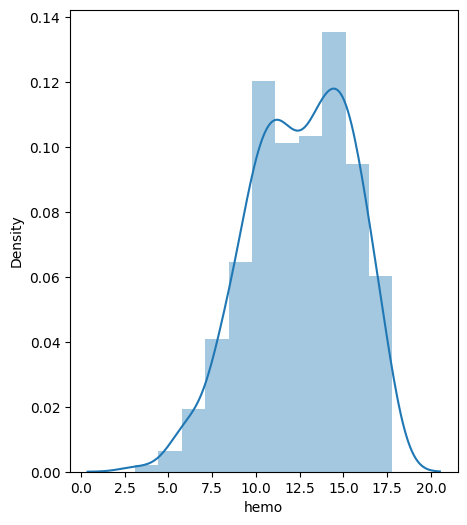

In [20]:
def displayplots(col):
  plt.figure(figsize = (5, 6))
  sns.distplot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude="object").columns)[1:]:
  displayplots(i)





**Finding Outliners**

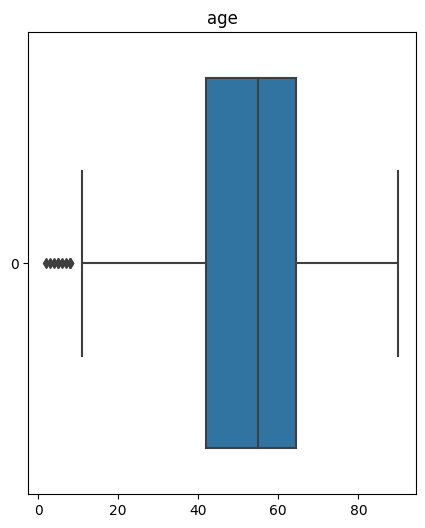

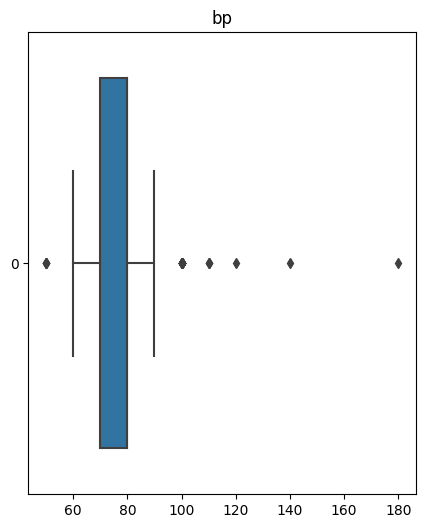

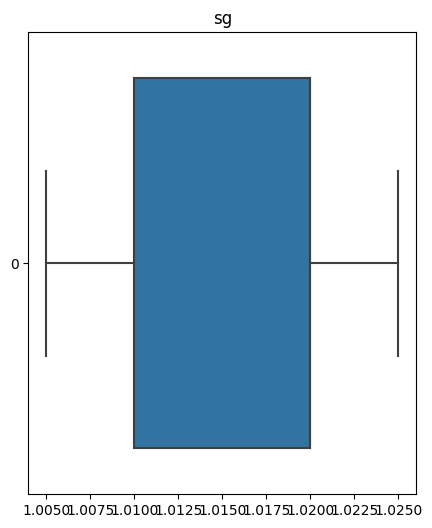

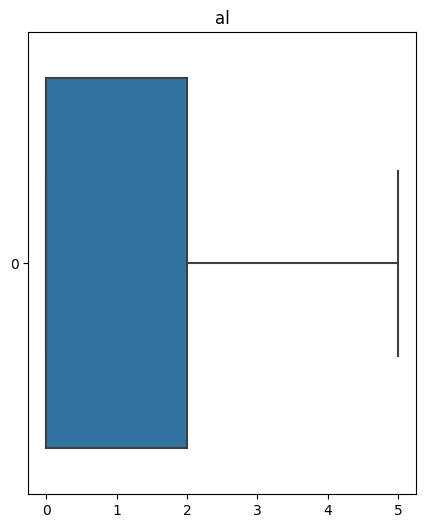

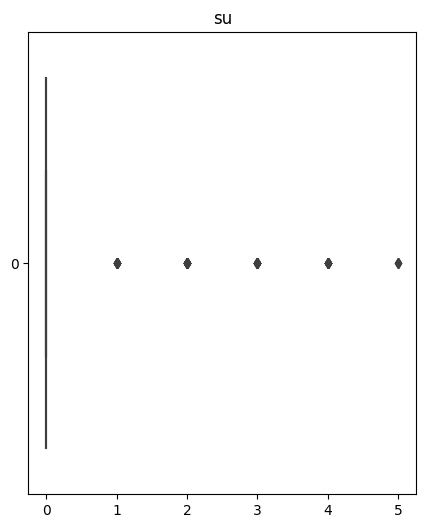

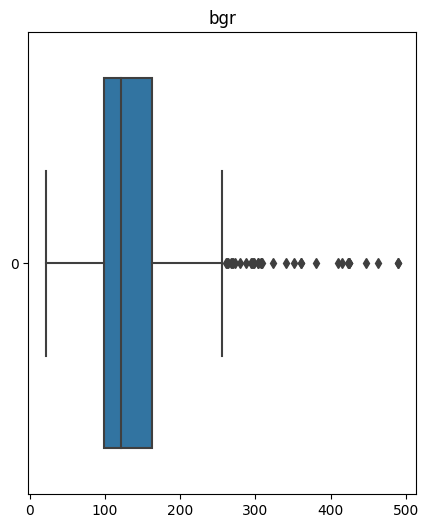

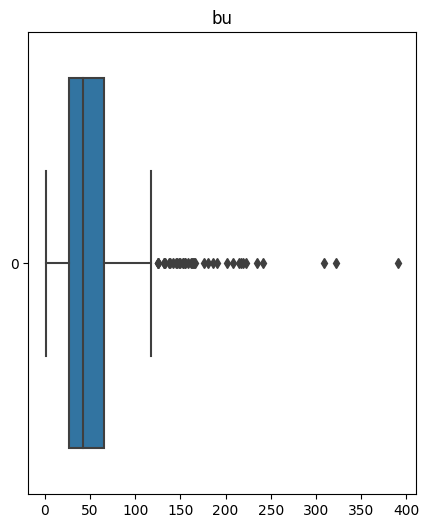

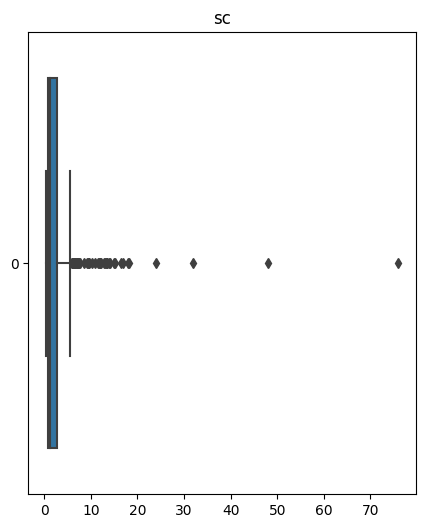

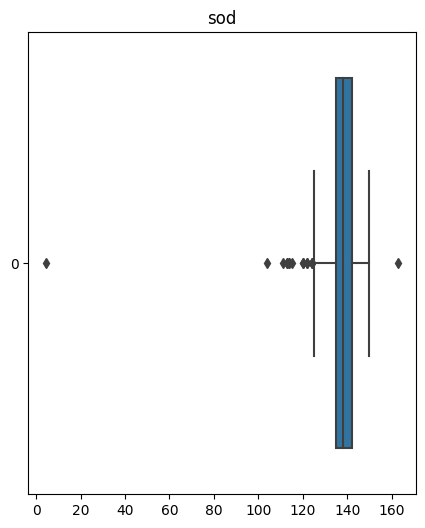

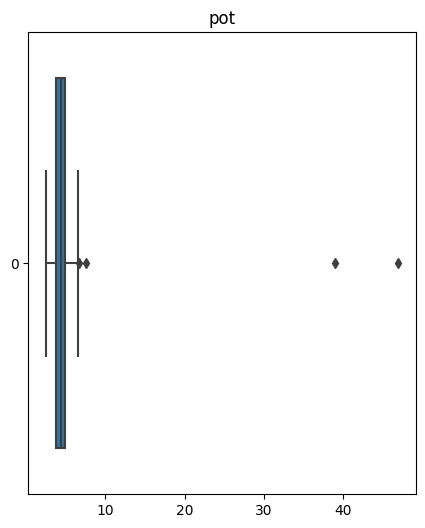

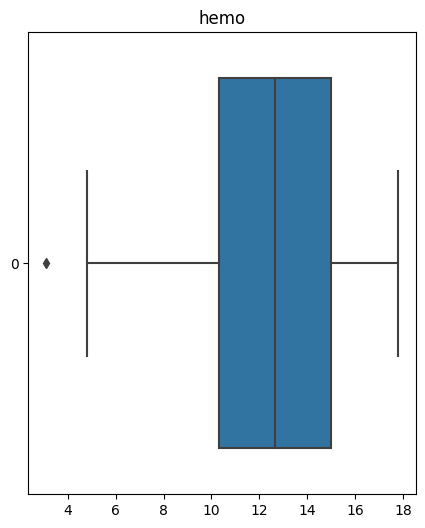

In [28]:
def boxplots(col):
  plt.figure(figsize = (5, 6))
  gph = sns.boxplot(df[col], orient='h')
  gph.set_title(col)
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)

**Encoding the data**

In [29]:
#using label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_encoded = df_imputed.apply(encoder.fit_transform)

df_encoded

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


In [31]:
df_encoded.to_csv("Kidney_disease_Preprocessed.csv")

**Finding Correlations**

<Axes: >

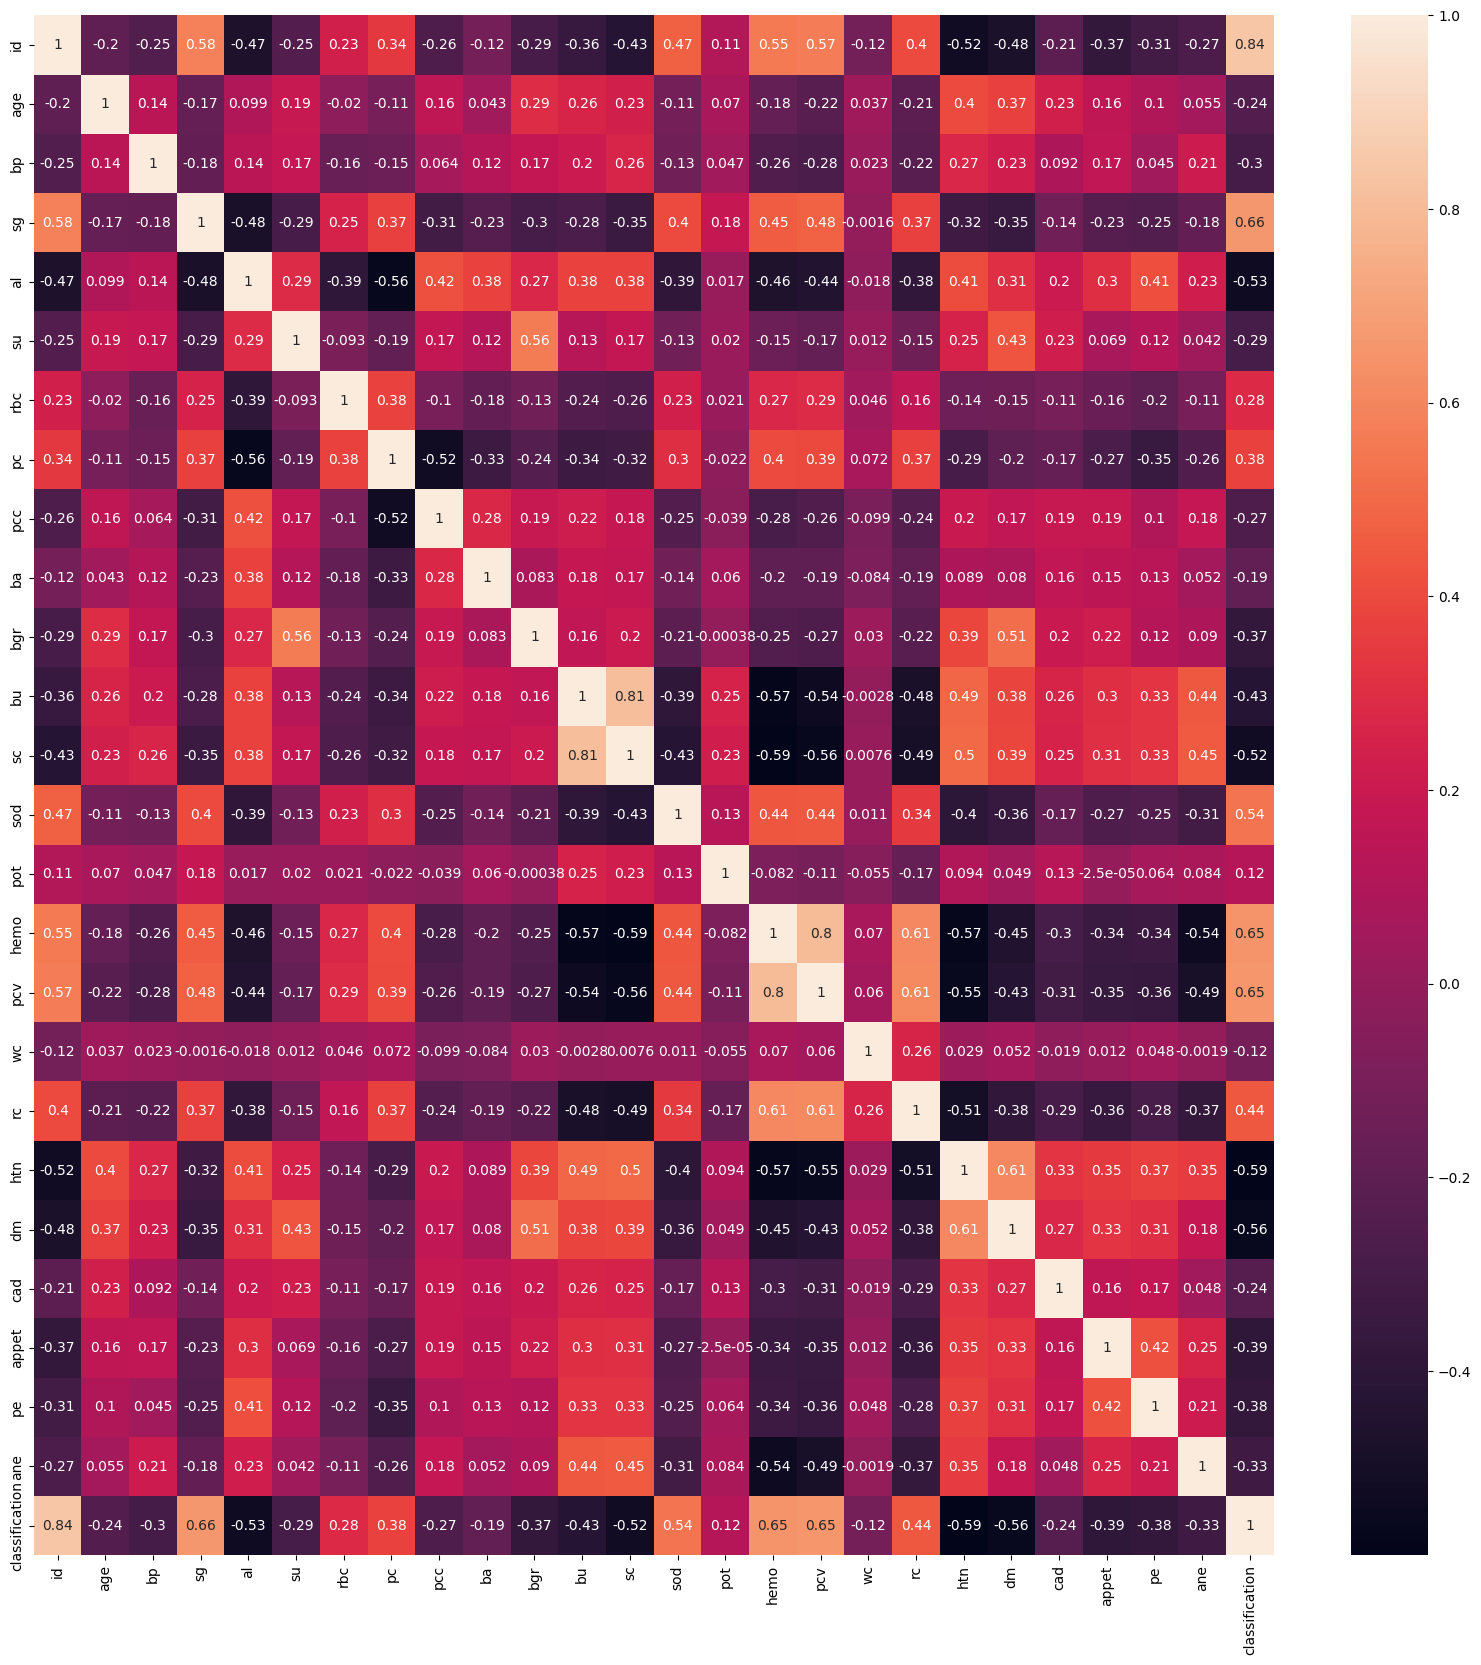

In [33]:
plt.figure(figsize=(20,20))
corr = df_encoded.corr()
sns.heatmap(corr,annot=True)

In [34]:
x = df_encoded.drop(["id", "classification"], axis=1)
y = df_encoded["classification"]

**Label Balancing**

In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Counter(y)

Counter({0: 250, 1: 150})

In [36]:
ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x,y)

Counter(y_ros)

Counter({0: 250, 1: 250})

**Feature Scaling**

In [40]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [43]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)



(500, 24)
(500, 18)


**Spliting train and test**

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)

**Building the nural network**

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping #we are not going to use it
from keras.models import Sequential, Model

from keras.optimizers import Adam
from sklearn.model_selection import KFold #Will not be used

In [54]:
def model():
  classifier = Sequential()
  classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation='relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15, activation='relu'))
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1, activation='sigmoid'))
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  
  return classifier


In [55]:
model = model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                285       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)

Epoch 1/5
13/13 [==============================] - 1s 19ms/step - loss: 0.7622 - accuracy: 0.4250 - val_loss: 0.7191 - val_accuracy: 0.4500
Epoch 2/5
13/13 [==============================] - 0s 6ms/step - loss: 0.7057 - accuracy: 0.5675 - val_loss: 0.6683 - val_accuracy: 0.7300
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 0.6681 - accuracy: 0.6300 - val_loss: 0.6249 - val_accuracy: 0.8200
Epoch 4/5
13/13 [==============================] - 0s 6ms/step - loss: 0.6061 - accuracy: 0.7275 - val_loss: 0.5851 - val_accuracy: 0.8800
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.7675 - val_loss: 0.5462 - val_accuracy: 0.9100


**Performance Analysis**

In [74]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, f1_score, confusion_matrix


#function to plot roc_curve
def plot_auc(t_y, p_y):
  fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1) #returning (false positive rate (fpr), true positive rate (tpr) and thresholds)
  fig, c_ax = plt.subplots(1,1, figsize=(9,9))
  c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f' % ('classification', auc(fpr, tpr)))
  c_ax.plot([0,1],[0,1],color='navy', lw=1,linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')


def plot_precision_recall_curve_helper(t_y, p_y):
  fig, c_ax = plt.subplots(1,1, figsize=(9,9))
  precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
  aps = average_precision_score(t_y, p_y)
  c_ax.plot(precision, recall, label='%s (AP Score:%0.2f' % ('classification', aps))
  c_ax.plot(recall,precision,color='red', lw=2)
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')


def plot_history(history):
  f = plt.figure()
  f.set_figwidth(15)

  f.add_subplot(1,2,1)
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['loss'], label='Training_loss')
  plt.legend()
  plt.title('Model Loss')

  f.add_subplot(1,2,2)
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(history.history['accuracy'], label='Training_accuracy')
  plt.legend()
  plt.title('Model Accuracy')


  plt.show()


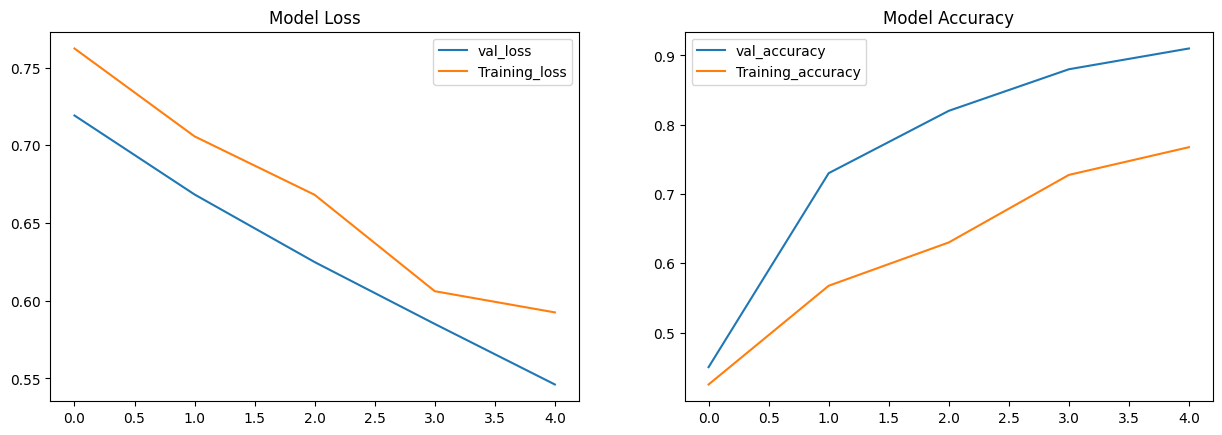

In [75]:
plot_history(history)

4/4 [==============================] - 0s 4ms/step


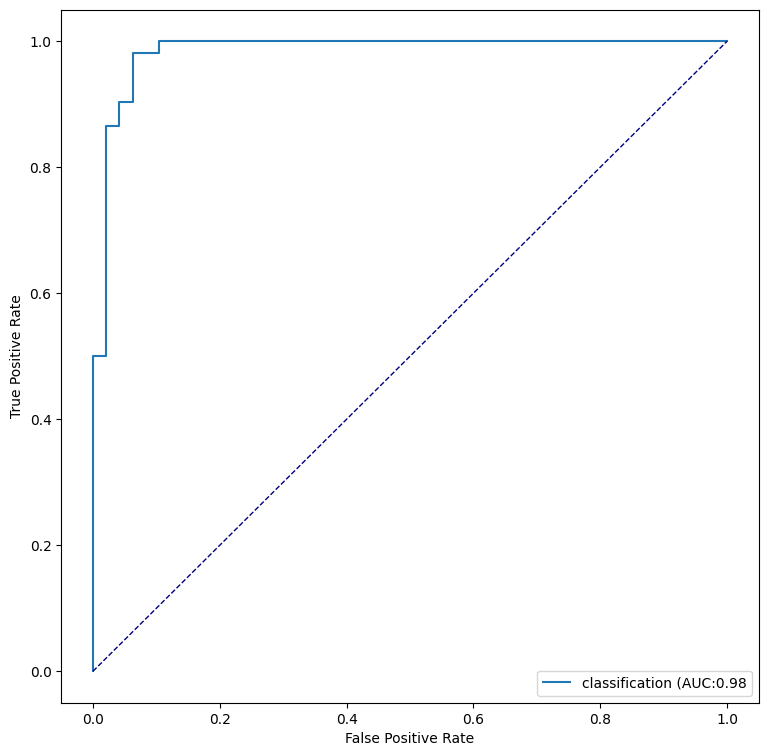

In [76]:
plot_auc(y_test, model.predict(x_test, verbose=True))

4/4 [==============================] - 0s 4ms/step


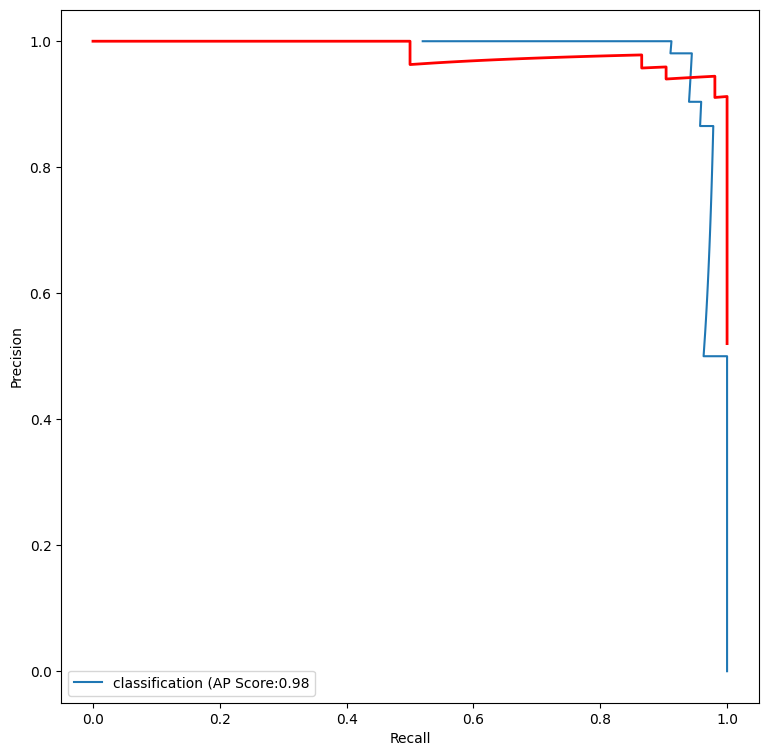

In [77]:
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose=True))

In [80]:
def calc_f1(precision, recall):
  return 2*(precision*recall)/(precision+recall) if recall and precision else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))

f1_score = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1_score)
threshold = thresholds[idx]

print("Precision = "+str(precision[idx]))
print("Recall = "+str(recall[idx]))
print("Threshold = "+str(thresholds[idx]))
print("F1 score = "+str(f1_score[idx]))

4/4 [==============================] - 0s 4ms/step
Precision = 0.9444444444444444
Recall = 0.9807692307692307
Threshold = 0.53568923
F1 score = 0.9622641509433962


Text(0, 0.5, 'f1 score')

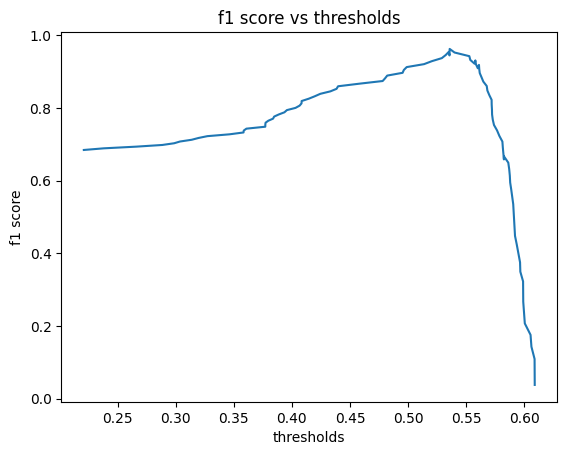

In [82]:
plt.figure()
plt.plot(thresholds,f1_score)
plt.title("f1 score vs thresholds")
plt.xlabel("thresholds")
plt.ylabel("f1 score")